In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports, constants and paths

In [ ]:
import pandas as pd
from collections import defaultdict
import random
import shutil
from datetime import datetime, timedelta

In [ ]:
root_directory = "/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/"
plots = root_directory + 'plots/'
preprocessed_data = root_directory + "preprocessed_data/"
testset1_data = root_directory + "testset1/"
testset2_data = root_directory + "testset2/"
originaltrainset = root_directory + "originaltrainset/"

# Create test set

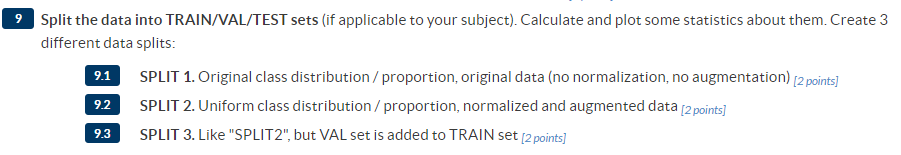

In [ ]:
df = pd.read_csv(root_directory + 'imagesmetadata.csv', index_col=0)
df

,name,mode,format,size,R,G,B,source,datetime,resolutionUnit,Xresolution,Yresolution,brightness,aperture,phonemake,phonemodel,ISOspeedratings,flash,focallength,sensingmethod
0,motorcycle0,RGB,JPEG,"(2976, 2976)","[13318, 5107, 3702, 4388, 3777, 4177, 4849, 48...","[6249, 5455, 3114, 2976, 3528, 3580, 4420, 451...","[9755, 3928, 2417, 2805, 4408, 4082, 4301, 482...",collected,2022:03:14 17:13:44,2.0,"(72, 1)","(72, 1)","(233, 100)","(169, 100)",Xiaomi,Mi Note 3,138,24,"(3820, 1000)",2.0
1,motorcycle1,RGB,JPEG,"(3024, 3024)","[340, 62, 68, 67, 94, 109, 118, 124, 157, 192,...","[3, 5, 4, 3, 7, 4, 8, 12, 19, 21, 22, 33, 34, ...","[27, 7, 2, 5, 7, 7, 14, 18, 15, 31, 27, 32, 49...",collected,2022:03:14 14:49:39,2.0,"(72, 1)","(72, 1)","(544, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN
2,motorcycle2,RGB,JPEG,"(3024, 3024)","[4, 0, 3, 1, 0, 1, 2, 5, 3, 5, 4, 6, 1, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",collected,2022:03:14 14:49:32,2.0,"(72, 1)","(72, 1)","(574, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN
3,motorcycle3,RGB,JPEG,"(3024, 3024)","[12, 4, 6, 16, 12, 16, 30, 27, 23, 30, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, ...",collected,2022:03:14 14:49:38,2.0,"(72, 1)","(72, 1)","(546, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN
4,motorcycle4,RGB,JPEG,"(3024, 3024)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",collected,2022:03:14 14:49:35,2.0,"(72, 1)","(72, 1)","(454, 100)","(252, 100)",samsung,SM-G965F,64,0,"(430, 100)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,truck1088,RGB,JPEG,"(1024, 768)","[1175, 765, 858, 1051, 1276, 1322, 1524, 1642,...","[213, 456, 639, 1157, 1208, 1520, 1863, 2045, ...","[5721, 2342, 3063, 3450, 3529, 3870, 4005, 400...",downloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8695,truck1089,RGB,JPEG,"(434, 326)","[5, 1, 2, 0, 2, 1, 4, 4, 5, 4, 10, 19, 37, 71,...","[5, 1, 2, 0, 2, 2, 5, 4, 6, 2, 11, 22, 37, 65,...","[1, 0, 4, 1, 4, 0, 0, 2, 6, 5, 10, 18, 46, 75,...",downloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8696,truck1090,RGB,JPEG,"(720, 313)","[3348, 2183, 1554, 1171, 1097, 1007, 1019, 906...","[5165, 2953, 1884, 1710, 1858, 1845, 1686, 160...","[2973, 1779, 1343, 1253, 992, 898, 883, 667, 6...",downloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8697,truck1091,RGB,JPEG,"(380, 228)","[294, 77, 72, 74, 107, 169, 155, 101, 89, 96, ...","[101, 52, 39, 37, 46, 48, 42, 55, 49, 71, 76, ...","[132, 32, 46, 37, 35, 36, 43, 45, 32, 51, 45, ...",downloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add class name to the dataframe

In [ ]:
def add_class(row):
  if row['name'].startswith('motorcycle'):
      return 'motorcycle'
  if row['name'].startswith('truck'):
      return 'truck'
  if row['name'].startswith('bicycle'):
      return 'bicycle'
  if row['name'].startswith('bus'):
      return 'bus'
  if row['name'].startswith('car'):
      return 'car'
  return 'other'

In [ ]:
df['class_name'] = df.apply(lambda row: add_class(row), axis='columns')

In [ ]:
for _, row in df.iterrows():
  print(row['name'].startswith('motorcycle'))
  break

True


In [ ]:
df

,name,mode,format,size,R,G,B,source,datetime,resolutionUnit,...,Yresolution,brightness,aperture,phonemake,phonemodel,ISOspeedratings,flash,focallength,sensingmethod,class_name
0,motorcycle0,RGB,JPEG,"(2976, 2976)","[13318, 5107, 3702, 4388, 3777, 4177, 4849, 48...","[6249, 5455, 3114, 2976, 3528, 3580, 4420, 451...","[9755, 3928, 2417, 2805, 4408, 4082, 4301, 482...",collected,2022:03:14 17:13:44,2.0,...,"(72, 1)","(233, 100)","(169, 100)",Xiaomi,Mi Note 3,138,24,"(3820, 1000)",2.0,motorcycle
1,motorcycle1,RGB,JPEG,"(3024, 3024)","[340, 62, 68, 67, 94, 109, 118, 124, 157, 192,...","[3, 5, 4, 3, 7, 4, 8, 12, 19, 21, 22, 33, 34, ...","[27, 7, 2, 5, 7, 7, 14, 18, 15, 31, 27, 32, 49...",collected,2022:03:14 14:49:39,2.0,...,"(72, 1)","(544, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
2,motorcycle2,RGB,JPEG,"(3024, 3024)","[4, 0, 3, 1, 0, 1, 2, 5, 3, 5, 4, 6, 1, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",collected,2022:03:14 14:49:32,2.0,...,"(72, 1)","(574, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
3,motorcycle3,RGB,JPEG,"(3024, 3024)","[12, 4, 6, 16, 12, 16, 30, 27, 23, 30, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, ...",collected,2022:03:14 14:49:38,2.0,...,"(72, 1)","(546, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
4,motorcycle4,RGB,JPEG,"(3024, 3024)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",collected,2022:03:14 14:49:35,2.0,...,"(72, 1)","(454, 100)","(252, 100)",samsung,SM-G965F,64,0,"(430, 100)",NaN,motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,truck1088,RGB,JPEG,"(1024, 768)","[1175, 765, 858, 1051, 1276, 1322, 1524, 1642,...","[213, 456, 639, 1157, 1208, 1520, 1863, 2045, ...","[5721, 2342, 3063, 3450, 3529, 3870, 4005, 400...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
8695,truck1089,RGB,JPEG,"(434, 326)","[5, 1, 2, 0, 2, 1, 4, 4, 5, 4, 10, 19, 37, 71,...","[5, 1, 2, 0, 2, 2, 5, 4, 6, 2, 11, 22, 37, 65,...","[1, 0, 4, 1, 4, 0, 0, 2, 6, 5, 10, 18, 46, 75,...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
8696,truck1090,RGB,JPEG,"(720, 313)","[3348, 2183, 1554, 1171, 1097, 1007, 1019, 906...","[5165, 2953, 1884, 1710, 1858, 1845, 1686, 160...","[2973, 1779, 1343, 1253, 992, 898, 883, 667, 6...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
8697,truck1091,RGB,JPEG,"(380, 228)","[294, 77, 72, 74, 107, 169, 155, 101, 89, 96, ...","[101, 52, 39, 37, 46, 48, 42, 55, 49, 71, 76, ...","[132, 32, 46, 37, 35, 36, 43, 45, 32, 51, 45, ...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck


### Create test set (with the correlated data)

We will create 2 test sets. One of them will include only data collected by us, second will include data downloaded from the internet. Test set 1 will contain 15% of the original data and test set 2 will contain 10% of the original data. Reason is not to take more than 50% of the data from the least numerous class.  
 - TEST SET 1: [in this set correlation needs to be checked]
  - 0.15*736 = 110 images; 
  - 110 images / 5 classes = 22 images per class
 - TEST SET 2: 
  - 0.1*7980 = 798 images; 
  - 798 images / 5 classes = 160 images per class



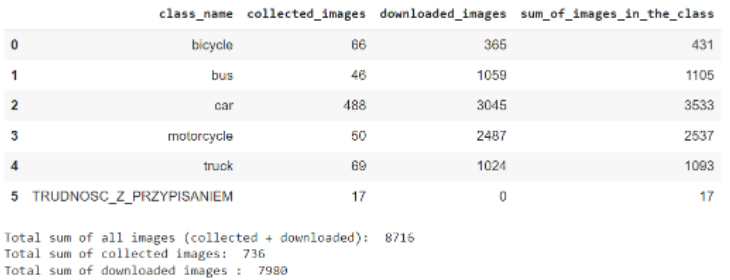

In [ ]:
df.class_name.value_counts()

car           3533
motorcycle    2537
bus           1105
truck         1093
bicycle        431
Name: class_name, dtype: int64

In [ ]:
list(df.class_name.unique())

['motorcycle', 'bicycle', 'bus', 'car', 'truck']

In [ ]:
list(df.class_name.unique())

['motorcycle', 'bicycle', 'bus', 'car', 'truck']

In [ ]:
motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list = list(), list(), list(), list(), list()
classes_list = [motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list]
list(zip(list(df.class_name.unique()), classes_list))

[('motorcycle', []), ('bicycle', []), ('bus', []), ('car', []), ('truck', [])]

In [ ]:
test_set2_dict = defaultdict(list)
motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list = list(), list(), list(), list(), list()
classes_list = [motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list]
#print(classes_list)

test_space2 = df[df.source == 'downloaded'].copy().reset_index(drop=True)
TO_DRAW = 160

for class_name, class_list_name in list(zip(list(df.class_name.unique()), classes_list)):
  #print(class_name, class_list_name)
  to_draw_from = list(test_space2[test_space2.class_name == class_name].name)
  drawed = random.sample(to_draw_from, k=TO_DRAW)
  class_list_name.append(drawed)
  #print(class_list_name)

test_set2_dict['motorcycle'] = motorcycles_list[0]
test_set2_dict['bicycle'] = bicycles_list[0]
test_set2_dict['bus'] = busses_list[0]
test_set2_dict['car'] = cars_list[0]
test_set2_dict['truck'] = trucks_list[0]
print(test_set2_dict)

defaultdict(<class 'list'>, {'motorcycle': ['motorcycle1532', 'motorcycle382', 'motorcycle2031', 'motorcycle331', 'motorcycle229', 'motorcycle2505', 'motorcycle2425', 'motorcycle1886', 'motorcycle1960', 'motorcycle1243', 'motorcycle1236', 'motorcycle1533', 'motorcycle455', 'motorcycle1036', 'motorcycle2419', 'motorcycle324', 'motorcycle1391', 'motorcycle1664', 'motorcycle638', 'motorcycle2207', 'motorcycle1596', 'motorcycle1598', 'motorcycle1022', 'motorcycle988', 'motorcycle823', 'motorcycle2490', 'motorcycle1795', 'motorcycle1356', 'motorcycle154', 'motorcycle317', 'motorcycle128', 'motorcycle2455', 'motorcycle1798', 'motorcycle969', 'motorcycle963', 'motorcycle1862', 'motorcycle312', 'motorcycle2444', 'motorcycle2459', 'motorcycle1539', 'motorcycle1622', 'motorcycle1556', 'motorcycle1081', 'motorcycle1562', 'motorcycle425', 'motorcycle1829', 'motorcycle1271', 'motorcycle1332', 'motorcycle304', 'motorcycle565', 'motorcycle607', 'motorcycle1892', 'motorcycle1032', 'motorcycle1813', 'm

In [ ]:
print(motorcycles_list[0])

['motorcycle2486', 'motorcycle230', 'motorcycle351', 'motorcycle1946', 'motorcycle720', 'motorcycle2179', 'motorcycle1151', 'motorcycle1548', 'motorcycle2355', 'motorcycle1507', 'motorcycle236', 'motorcycle1088', 'motorcycle2513', 'motorcycle1988', 'motorcycle1076', 'motorcycle1881', 'motorcycle1864', 'motorcycle1970', 'motorcycle503', 'motorcycle497', 'motorcycle314', 'motorcycle1639', 'motorcycle265', 'motorcycle323', 'motorcycle1202', 'motorcycle1891', 'motorcycle977', 'motorcycle2257', 'motorcycle266', 'motorcycle1686', 'motorcycle2504', 'motorcycle1918', 'motorcycle2044', 'motorcycle425', 'motorcycle1438', 'motorcycle1056', 'motorcycle1345', 'motorcycle1219', 'motorcycle483', 'motorcycle2275', 'motorcycle504', 'motorcycle1213', 'motorcycle122', 'motorcycle595', 'motorcycle2456', 'motorcycle1866', 'motorcycle1895', 'motorcycle2466', 'motorcycle777', 'motorcycle2435', 'motorcycle437', 'motorcycle963', 'motorcycle1814', 'motorcycle892', 'motorcycle2060', 'motorcycle1577', 'motorcycle

In [ ]:
print(test_set2_dict)

defaultdict(<class 'list'>, {'motorcycle': ['motorcycle1223', 'motorcycle2457', 'motorcycle2093', 'motorcycle239', 'motorcycle344', 'motorcycle2001', 'motorcycle1524', 'motorcycle73', 'motorcycle1062', 'motorcycle1251', 'motorcycle433', 'motorcycle1145', 'motorcycle511', 'motorcycle1068', 'motorcycle1828', 'motorcycle1437', 'motorcycle1833', 'motorcycle1024', 'motorcycle1030', 'motorcycle858', 'motorcycle793', 'motorcycle1577', 'motorcycle2121', 'motorcycle391', 'motorcycle1588', 'motorcycle2103', 'motorcycle657', 'motorcycle2028', 'motorcycle1974', 'motorcycle507', 'motorcycle2253', 'motorcycle2358', 'motorcycle1860', 'motorcycle2451', 'motorcycle1018', 'motorcycle1268', 'motorcycle1488', 'motorcycle632', 'motorcycle1283', 'motorcycle1285', 'motorcycle444', 'motorcycle1872', 'motorcycle1431', 'motorcycle977', 'motorcycle2163', 'motorcycle486', 'motorcycle161', 'motorcycle1889', 'motorcycle1792', 'motorcycle1506', 'motorcycle126', 'motorcycle1199', 'motorcycle1887', 'motorcycle445', 'm

In [ ]:
print(test_set2_dict['motorcycle'])

['motorcycle2486', 'motorcycle230', 'motorcycle351', 'motorcycle1946', 'motorcycle720', 'motorcycle2179', 'motorcycle1151', 'motorcycle1548', 'motorcycle2355', 'motorcycle1507', 'motorcycle236', 'motorcycle1088', 'motorcycle2513', 'motorcycle1988', 'motorcycle1076', 'motorcycle1881', 'motorcycle1864', 'motorcycle1970', 'motorcycle503', 'motorcycle497', 'motorcycle314', 'motorcycle1639', 'motorcycle265', 'motorcycle323', 'motorcycle1202', 'motorcycle1891', 'motorcycle977', 'motorcycle2257', 'motorcycle266', 'motorcycle1686', 'motorcycle2504', 'motorcycle1918', 'motorcycle2044', 'motorcycle425', 'motorcycle1438', 'motorcycle1056', 'motorcycle1345', 'motorcycle1219', 'motorcycle483', 'motorcycle2275', 'motorcycle504', 'motorcycle1213', 'motorcycle122', 'motorcycle595', 'motorcycle2456', 'motorcycle1866', 'motorcycle1895', 'motorcycle2466', 'motorcycle777', 'motorcycle2435', 'motorcycle437', 'motorcycle963', 'motorcycle1814', 'motorcycle892', 'motorcycle2060', 'motorcycle1577', 'motorcycle

In [ ]:
len(test_set2_dict['motorcycle'])

160

In [ ]:
len(set(test_set2_dict['motorcycle']))

160

##### Save created test set

In [ ]:
for key in test_set2_dict.keys():
  for image in test_set2_dict[key]:
    original_path = preprocessed_data + key + '/' + image + '.JPEG'
    target_path = testset2_data + key + '/' + image + '.JPEG'
    #print(original_path)
    #print(target_path)
    shutil.copyfile(original_path, target_path)

##### Data which was not drawed to the test set should be saved in the "originaltrainset" folder. 

In [ ]:
train_space2[train_space2['class_name'] == class_name].copy().reset_index(drop=True)

,name,mode,format,size,R,G,B,source,datetime,resolutionUnit,...,Yresolution,brightness,aperture,phonemake,phonemodel,ISOspeedratings,flash,focallength,sensingmethod,class_name
0,truck69,RGB,JPEG,"(200, 150)","[12, 8, 18, 21, 39, 34, 50, 64, 76, 68, 82, 98...","[4, 9, 6, 15, 24, 43, 31, 47, 63, 47, 89, 112,...","[4, 9, 14, 19, 26, 29, 23, 62, 67, 87, 106, 10...",downloaded,2008:03:13 11:14:14,2.0,...,"(180, 1)",NaN,"(181, 32)",Canon,Canon PowerShot SD800 IS,NaN,24,"(4600, 1000)",NaN,truck
1,truck70,RGB,JPEG,"(259, 194)","[75, 22, 17, 16, 21, 25, 33, 43, 30, 28, 24, 2...","[44, 23, 15, 35, 35, 45, 38, 42, 49, 55, 74, 9...","[85, 15, 27, 21, 37, 51, 58, 64, 57, 81, 90, 8...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
2,truck71,RGB,JPEG,"(640, 480)","[231, 84, 110, 156, 238, 401, 549, 1380, 783, ...","[133, 45, 64, 104, 190, 282, 554, 1360, 739, 6...","[195, 53, 105, 139, 245, 309, 447, 1281, 702, ...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
3,truck72,RGB,JPEG,"(248, 186)","[4066, 691, 391, 344, 514, 400, 354, 357, 494,...","[4326, 780, 467, 255, 276, 335, 328, 475, 544,...","[4518, 557, 538, 511, 460, 664, 594, 527, 438,...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
4,truck73,RGB,JPEG,"(1280, 960)","[897, 331, 285, 587, 695, 666, 826, 794, 929, ...","[1284, 470, 365, 343, 311, 294, 310, 327, 475,...","[950, 170, 327, 284, 421, 506, 702, 1138, 2082...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,truck1088,RGB,JPEG,"(1024, 768)","[1175, 765, 858, 1051, 1276, 1322, 1524, 1642,...","[213, 456, 639, 1157, 1208, 1520, 1863, 2045, ...","[5721, 2342, 3063, 3450, 3529, 3870, 4005, 400...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
1020,truck1089,RGB,JPEG,"(434, 326)","[5, 1, 2, 0, 2, 1, 4, 4, 5, 4, 10, 19, 37, 71,...","[5, 1, 2, 0, 2, 2, 5, 4, 6, 2, 11, 22, 37, 65,...","[1, 0, 4, 1, 4, 0, 0, 2, 6, 5, 10, 18, 46, 75,...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
1021,truck1090,RGB,JPEG,"(720, 313)","[3348, 2183, 1554, 1171, 1097, 1007, 1019, 906...","[5165, 2953, 1884, 1710, 1858, 1845, 1686, 160...","[2973, 1779, 1343, 1253, 992, 898, 883, 667, 6...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck
1022,truck1091,RGB,JPEG,"(380, 228)","[294, 77, 72, 74, 107, 169, 155, 101, 89, 96, ...","[101, 52, 39, 37, 46, 48, 42, 55, 49, 71, 76, ...","[132, 32, 46, 37, 35, 36, 43, 45, 32, 51, 45, ...",downloaded,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,truck


In [ ]:
train_set2_dict = defaultdict(list)
motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list = list(), list(), list(), list(), list()
classes_list = [motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list]
#print(classes_list)

train_space2 = df[df.source == 'downloaded'].copy().reset_index(drop=True)

for class_name, class_list_name in list(zip(list(df.class_name.unique()), classes_list)):
  print(class_name)
  temporary_space = train_space2[train_space2['class_name'] == class_name].copy().reset_index(drop=True)
  #print(temporary_space)
  for index, row in temporary_space.iterrows():
    #print(test_set2_dict[class_name])
    if row['name'] not in test_set2_dict[class_name]:
      #print(class_list_name)
      class_list_name.append(row['name'])

train_set2_dict['motorcycle'] = motorcycles_list#[0]
train_set2_dict['bicycle'] = bicycles_list
train_set2_dict['bus'] = busses_list
train_set2_dict['car'] = cars_list
train_set2_dict['truck'] = trucks_list
print(train_set2_dict)

motorcycle
bicycle
bus
car
truck
defaultdict(<class 'list'>, {'motorcycle': ['motorcycle50', 'motorcycle51', 'motorcycle52', 'motorcycle53', 'motorcycle54', 'motorcycle55', 'motorcycle56', 'motorcycle57', 'motorcycle58', 'motorcycle59', 'motorcycle60', 'motorcycle61', 'motorcycle62', 'motorcycle63', 'motorcycle64', 'motorcycle65', 'motorcycle66', 'motorcycle67', 'motorcycle68', 'motorcycle69', 'motorcycle70', 'motorcycle71', 'motorcycle72', 'motorcycle73', 'motorcycle74', 'motorcycle75', 'motorcycle76', 'motorcycle78', 'motorcycle80', 'motorcycle81', 'motorcycle82', 'motorcycle83', 'motorcycle84', 'motorcycle85', 'motorcycle86', 'motorcycle87', 'motorcycle88', 'motorcycle89', 'motorcycle90', 'motorcycle91', 'motorcycle92', 'motorcycle93', 'motorcycle94', 'motorcycle95', 'motorcycle96', 'motorcycle97', 'motorcycle99', 'motorcycle100', 'motorcycle101', 'motorcycle102', 'motorcycle103', 'motorcycle104', 'motorcycle105', 'motorcycle106', 'motorcycle107', 'motorcycle108', 'motorcycle109', '

In [ ]:
len(train_set2_dict['motorcycle'])

2327

In [ ]:
len(set(train_set2_dict['motorcycle']))

2327

In [ ]:
for key in train_set2_dict.keys():
  for image in train_set2_dict[key]:
    original_path = preprocessed_data + key + '/' + image + '.JPEG'
    target_path = originaltrainset + key + '/' + image + '.JPEG'
    #print(original_path)
    #print(target_path)
    shutil.copyfile(original_path, target_path)

# Check correlations between pictures
1. Correlations will we checked within the class and only in the "collected" part of the data. 
2. We will use the 'datetime' column, which indicates the date and time when the image was created. If the time between doing 2 photos is less than 30 seconds, we will mark those 2 images as correlated. 
Threshold of 30s is based on the data analysis. 

In [ ]:
test_space1 = df[df.source == 'collected'].copy().reset_index(drop=True)
test_space1

,name,mode,format,size,R,G,B,source,datetime,resolutionUnit,...,Yresolution,brightness,aperture,phonemake,phonemodel,ISOspeedratings,flash,focallength,sensingmethod,class_name
0,motorcycle0,RGB,JPEG,"(2976, 2976)","[13318, 5107, 3702, 4388, 3777, 4177, 4849, 48...","[6249, 5455, 3114, 2976, 3528, 3580, 4420, 451...","[9755, 3928, 2417, 2805, 4408, 4082, 4301, 482...",collected,2022:03:14 17:13:44,2.0,...,"(72, 1)","(233, 100)","(169, 100)",Xiaomi,Mi Note 3,138,24,"(3820, 1000)",2.0,motorcycle
1,motorcycle1,RGB,JPEG,"(3024, 3024)","[340, 62, 68, 67, 94, 109, 118, 124, 157, 192,...","[3, 5, 4, 3, 7, 4, 8, 12, 19, 21, 22, 33, 34, ...","[27, 7, 2, 5, 7, 7, 14, 18, 15, 31, 27, 32, 49...",collected,2022:03:14 14:49:39,2.0,...,"(72, 1)","(544, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
2,motorcycle2,RGB,JPEG,"(3024, 3024)","[4, 0, 3, 1, 0, 1, 2, 5, 3, 5, 4, 6, 1, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",collected,2022:03:14 14:49:32,2.0,...,"(72, 1)","(574, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
3,motorcycle3,RGB,JPEG,"(3024, 3024)","[12, 4, 6, 16, 12, 16, 30, 27, 23, 30, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, ...",collected,2022:03:14 14:49:38,2.0,...,"(72, 1)","(546, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
4,motorcycle4,RGB,JPEG,"(3024, 3024)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",collected,2022:03:14 14:49:35,2.0,...,"(72, 1)","(454, 100)","(252, 100)",samsung,SM-G965F,64,0,"(430, 100)",NaN,motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,truck64,RGB,JPEG,"(4240, 4240)","[1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",collected,2022:03:16 09:13:08,2.0,...,"(72, 1)","(451, 100)","(153, 100)",samsung,SM-A750FN,64,0,"(393, 100)",NaN,truck
715,truck65,RGB,JPEG,"(4240, 4240)","[0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, ...","[0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, ...",collected,2022:03:18 13:05:27,2.0,...,"(72, 1)","(790, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck
716,truck66,RGB,JPEG,"(4240, 4240)","[0, 4, 4, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, ...","[8, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ...","[4, 4, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...",collected,2022:03:18 13:07:05,2.0,...,"(72, 1)","(799, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck
717,truck67,RGB,JPEG,"(4240, 4240)","[0, 0, 0, 2, 1, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, ...","[3, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[2, 1, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",collected,2022:03:18 13:07:06,2.0,...,"(72, 1)","(728, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck


In [ ]:
THRESHOLD = 17 # how many pictures do I need in every class
CORRELATION_TIME = 30 # how many seconds between taking pictures in order not to be correlated

test_space1 = df[df.source == 'collected'].copy().reset_index(drop=True)

test_set1_dict = defaultdict(list)
motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list = list(), list(), list(), list(), list()
classes_list = [motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list]

for class_name, class_list_name in list(zip(list(df.class_name.unique()), classes_list)):
  temporary_space = test_space1[test_space1['class_name'] == class_name].copy().reset_index(drop=True) # choose data within one class
  iteration_list = list(zip(temporary_space.name, temporary_space['datetime'])) # iterate over list of tuples (image_name, datetime), eg.: [('motorcycle0', '2022:03:14 17:13:44'), ('motorcycle1', '2022:03:14 14:49:39'), ...]
  print("beginning length: ", len(iteration_list))
  i = 0; 
  while i < THRESHOLD: # until we achieve required number of pictures
    
    considered_image = random.sample(iteration_list, k=1) # randomly choose one element from the list
    class_list_name.append(considered_image[0]) # add image to the test set 
    iteration_list = set(iteration_list).difference(set(class_list_name)) # update iteration list (substract this one correlated element which have already been found)
    iteration_list = list(iteration_list)

    for image_name, _datetime in iteration_list:
      considered_image_datetime = datetime.strptime(considered_image[0][1], '%Y:%m:%d %H:%M:%S') #datetime in the form '%Y:%m:%d %H:%M:%S', eg.: 2022:03:14 17:13:44	
      another_image_datetime = datetime.strptime(_datetime, '%Y:%m:%d %H:%M:%S')
      correlation_timedelta = timedelta(seconds=CORRELATION_TIME)
      if abs(considered_image_datetime - another_image_datetime) < correlation_timedelta:
        i += 1; # upgrade iterator - one more correlated picture found
        class_list_name.append((image_name, _datetime)) # add image name to the test set 

    iteration_list = set(iteration_list).difference(set(class_list_name)) # update iteration list (substract correlated elements which have already been found)
    iteration_list = list(iteration_list) # make list from set
    # end of while loop iteration
  print("length after substraction", len(iteration_list))

#end of classes_names for loop iteration

test_set1_dict['motorcycle'] = motorcycles_list
test_set1_dict['bicycle'] = bicycles_list
test_set1_dict['bus'] = busses_list
test_set1_dict['car'] = cars_list
test_set1_dict['truck'] = trucks_list
print(test_set1_dict)

beginning length:  50
length after substraction 19
beginning length:  66
length after substraction 41
beginning length:  46
length after substraction 23
beginning length:  488
length after substraction 457
beginning length:  69
length after substraction 48
defaultdict(<class 'list'>, {'motorcycle': [('motorcycle38', '2022:03:18 15:08:41'), ('motorcycle41', '2022:03:18 15:08:52'), ('motorcycle36', '2022:03:18 15:08:35'), ('motorcycle42', '2022:03:18 15:08:54'), ('motorcycle44', '2022:03:18 15:08:57'), ('motorcycle35', '2022:03:18 15:08:32'), ('motorcycle37', '2022:03:18 15:08:39'), ('motorcycle43', '2022:03:18 15:08:55'), ('motorcycle33', '2022:03:18 15:08:29'), ('motorcycle34', '2022:03:18 15:08:31'), ('motorcycle39', '2022:03:18 15:08:44'), ('motorcycle40', '2022:03:18 15:08:45'), ('motorcycle27', '2022:03:13 15:48:37'), ('motorcycle31', '2022:03:13 15:48:46'), ('motorcycle32', '2022:03:13 15:48:47'), ('motorcycle28', '2022:03:13 15:48:39'), ('motorcycle30', '2022:03:13 15:48:43'), ('

In [ ]:
len(iteration_list)

48

In [ ]:
# TODO: make function
# tmp = create_uncorrelated_set(dataframe, NO_PICTURES_IN_CLASS, CORRELATION_TIME, data_source)

##### Save created test set 1:

In [ ]:
for key in test_set1_dict.keys():
  for image, _datetime in test_set1_dict[key]:
    original_path = preprocessed_data + key + '/' + image + '.JPEG'
    target_path = testset1_data + key + '/' + image + '.JPEG'
    #print(original_path)
    #print(target_path)
    shutil.copyfile(original_path, target_path)

##### Save rest of the photos to the originaltrainset

In [ ]:
print(test_set1_dict)

defaultdict(<class 'list'>, {'motorcycle': [('motorcycle38', '2022:03:18 15:08:41'), ('motorcycle41', '2022:03:18 15:08:52'), ('motorcycle36', '2022:03:18 15:08:35'), ('motorcycle42', '2022:03:18 15:08:54'), ('motorcycle44', '2022:03:18 15:08:57'), ('motorcycle35', '2022:03:18 15:08:32'), ('motorcycle37', '2022:03:18 15:08:39'), ('motorcycle43', '2022:03:18 15:08:55'), ('motorcycle33', '2022:03:18 15:08:29'), ('motorcycle34', '2022:03:18 15:08:31'), ('motorcycle39', '2022:03:18 15:08:44'), ('motorcycle40', '2022:03:18 15:08:45'), ('motorcycle27', '2022:03:13 15:48:37'), ('motorcycle31', '2022:03:13 15:48:46'), ('motorcycle32', '2022:03:13 15:48:47'), ('motorcycle28', '2022:03:13 15:48:39'), ('motorcycle30', '2022:03:13 15:48:43'), ('motorcycle29', '2022:03:13 15:48:40'), ('motorcycle16', '2022:03:13 15:46:32'), ('motorcycle19', '2022:03:13 15:46:38'), ('motorcycle23', '2022:03:13 15:46:49'), ('motorcycle15', '2022:03:13 15:46:31'), ('motorcycle17', '2022:03:13 15:46:34'), ('motorcycle2

In [ ]:
my_dict = {'motorcycle': [('motorcycle38', '2022:03:18 15:08:41'), ('motorcycle41', '2022:03:18 15:08:52'), ('motorcycle36', '2022:03:18 15:08:35'), ('motorcycle42', '2022:03:18 15:08:54'), ('motorcycle44', '2022:03:18 15:08:57'), ('motorcycle35', '2022:03:18 15:08:32'), ('motorcycle37', '2022:03:18 15:08:39'), ('motorcycle43', '2022:03:18 15:08:55'), ('motorcycle33', '2022:03:18 15:08:29'), ('motorcycle34', '2022:03:18 15:08:31'), ('motorcycle39', '2022:03:18 15:08:44'), ('motorcycle40', '2022:03:18 15:08:45'), ('motorcycle27', '2022:03:13 15:48:37'), ('motorcycle31', '2022:03:13 15:48:46'), ('motorcycle32', '2022:03:13 15:48:47'), ('motorcycle28', '2022:03:13 15:48:39'), ('motorcycle30', '2022:03:13 15:48:43'), ('motorcycle29', '2022:03:13 15:48:40'), ('motorcycle16', '2022:03:13 15:46:32'), ('motorcycle19', '2022:03:13 15:46:38'), ('motorcycle23', '2022:03:13 15:46:49'), ('motorcycle15', '2022:03:13 15:46:31'), ('motorcycle17', '2022:03:13 15:46:34'), ('motorcycle21', '2022:03:13 15:46:45'), ('motorcycle20', '2022:03:13 15:46:41'), ('motorcycle24', '2022:03:13 15:46:51'), ('motorcycle25', '2022:03:13 15:46:53'), ('motorcycle14', '2022:03:13 15:46:28'), ('motorcycle26', '2022:03:13 15:46:54'), ('motorcycle18', '2022:03:13 15:46:36'), ('motorcycle22', '2022:03:13 15:46:47')], 'bicycle': [('bicycle34', '2022:03:12 15:50:18'), ('bicycle31', '2022:03:12 15:50:06'), ('bicycle32', '2022:03:12 15:50:08'), ('bicycle33', '2022:03:12 15:50:15'), ('bicycle26', '2022:03:15 17:26:01'), ('bicycle23', '2022:03:15 17:26:22'), ('bicycle30', '2022:03:15 17:26:08'), ('bicycle20', '2022:03:15 17:26:26'), ('bicycle25', '2022:03:15 17:26:15'), ('bicycle17', '2022:03:15 17:26:30'), ('bicycle19', '2022:03:15 17:26:00'), ('bicycle22', '2022:03:15 17:26:26'), ('bicycle24', '2022:03:15 17:26:04'), ('bicycle16', '2022:03:15 17:26:23'), ('bicycle29', '2022:03:15 17:26:30'), ('bicycle47', '2022:03:14 14:22:31'), ('bicycle50', '2022:03:14 14:22:59'), ('bicycle49', '2022:03:14 14:22:56'), ('bicycle48', '2022:03:14 14:22:36'), ('bicycle60', '2022:03:14 14:24:22'), ('bicycle57', '2022:03:14 14:23:56'), ('bicycle58', '2022:03:14 14:23:59'), ('bicycle59', '2022:03:14 14:24:00'), ('bicycle62', '2022:03:14 14:24:33'), ('bicycle61', '2022:03:14 14:24:27')], 'bus': [('bus0', '2022:03:12 12:33:44'), ('bus25', '2022:03:13 15:49:14'), ('bus23', '2022:03:13 15:49:11'), ('bus22', '2022:03:13 15:49:05'), ('bus24', '2022:03:13 15:49:12'), ('bus21', '2022:03:13 15:49:05'), ('bus18', '2022:03:14 14:44:32'), ('bus6', '2022:03:14 14:44:30'), ('bus5', '2022:03:14 14:44:31'), ('bus7', '2022:03:14 14:44:28'), ('bus11', '2022:03:14 17:10:16'), ('bus14', '2022:03:14 17:10:37'), ('bus17', '2022:03:14 17:10:39'), ('bus13', '2022:03:14 17:10:38'), ('bus9', '2022:03:14 17:10:14'), ('bus15', '2022:03:14 17:10:23'), ('bus12', '2022:03:14 17:10:42'), ('bus8', '2022:03:14 17:10:13'), ('bus16', '2022:03:14 17:10:47'), ('bus10', '2022:03:14 17:10:49'), ('bus26', '2022:03:13 15:54:17'), ('bus28', '2022:03:13 15:54:20'), ('bus27', '2022:03:13 15:54:18')], 'car': [('car106', '2022:03:12 12:39:47'), ('car115', '2022:03:12 12:40:15'), ('car120', '2022:03:12 12:40:10'), ('car107', '2022:03:12 12:39:19'), ('car116', '2022:03:12 12:40:03'), ('car114', '2022:03:12 12:39:18'), ('car105', '2022:03:12 12:39:31'), ('car117', '2022:03:12 12:40:06'), ('car108', '2022:03:12 12:39:23'), ('car127', '2022:03:12 12:40:08'), ('car110', '2022:03:12 12:39:58'), ('car104', '2022:03:12 12:39:33'), ('car103', '2022:03:12 12:39:46'), ('car113', '2022:03:12 12:39:40'), ('car112', '2022:03:12 12:39:21'), ('car180', '2022:03:12 12:46:41'), ('car178', '2022:03:12 12:46:53'), ('car173', '2022:03:12 12:46:54'), ('car170', '2022:03:12 12:46:12'), ('car174', '2022:03:12 12:46:38'), ('car190', '2022:03:12 12:47:05'), ('car172', '2022:03:12 12:46:58'), ('car188', '2022:03:12 12:47:01'), ('car171', '2022:03:12 12:46:24'), ('car187', '2022:03:12 12:47:03'), ('car166', '2022:03:12 12:46:14'), ('car176', '2022:03:12 12:46:22'), ('car179', '2022:03:12 12:46:27'), ('car177', '2022:03:12 12:46:32'), ('car165', '2022:03:12 12:46:19'), ('car175', '2022:03:12 12:46:29')], 'truck': [('truck57', '2022:03:14 14:40:22'), ('truck19', '2022:03:14 14:40:39'), ('truck58', '2022:03:14 14:40:23'), ('truck23', '2022:03:14 14:40:33'), ('truck20', '2022:03:14 14:40:38'), ('truck25', '2022:03:14 14:40:31'), ('truck22', '2022:03:14 14:40:41'), ('truck18', '2022:03:14 14:40:48'), ('truck42', '2022:03:13 15:57:13'), ('truck41', '2022:03:13 15:57:12'), ('truck40', '2022:03:13 15:57:10'), ('truck53', '2022:03:13 17:54:07'), ('truck54', '2022:03:13 17:54:10'), ('truck48', '2022:03:13 17:53:55'), ('truck52', '2022:03:13 17:54:06'), ('truck50', '2022:03:13 17:54:02'), ('truck51', '2022:03:13 17:54:05'), ('truck49', '2022:03:13 17:53:57'), ('truck60', '2022:03:16 09:11:13'), ('truck61', '2022:03:16 09:11:17'), ('truck59', '2022:03:16 09:11:09')]}
print(my_dict)

{'motorcycle': [('motorcycle38', '2022:03:18 15:08:41'), ('motorcycle41', '2022:03:18 15:08:52'), ('motorcycle36', '2022:03:18 15:08:35'), ('motorcycle42', '2022:03:18 15:08:54'), ('motorcycle44', '2022:03:18 15:08:57'), ('motorcycle35', '2022:03:18 15:08:32'), ('motorcycle37', '2022:03:18 15:08:39'), ('motorcycle43', '2022:03:18 15:08:55'), ('motorcycle33', '2022:03:18 15:08:29'), ('motorcycle34', '2022:03:18 15:08:31'), ('motorcycle39', '2022:03:18 15:08:44'), ('motorcycle40', '2022:03:18 15:08:45'), ('motorcycle27', '2022:03:13 15:48:37'), ('motorcycle31', '2022:03:13 15:48:46'), ('motorcycle32', '2022:03:13 15:48:47'), ('motorcycle28', '2022:03:13 15:48:39'), ('motorcycle30', '2022:03:13 15:48:43'), ('motorcycle29', '2022:03:13 15:48:40'), ('motorcycle16', '2022:03:13 15:46:32'), ('motorcycle19', '2022:03:13 15:46:38'), ('motorcycle23', '2022:03:13 15:46:49'), ('motorcycle15', '2022:03:13 15:46:31'), ('motorcycle17', '2022:03:13 15:46:34'), ('motorcycle21', '2022:03:13 15:46:45'), 

In [ ]:
df[df.source == 'collected'].reset_index(drop=True)

,name,mode,format,size,R,G,B,source,datetime,resolutionUnit,...,Yresolution,brightness,aperture,phonemake,phonemodel,ISOspeedratings,flash,focallength,sensingmethod,class_name
0,motorcycle0,RGB,JPEG,"(2976, 2976)","[13318, 5107, 3702, 4388, 3777, 4177, 4849, 48...","[6249, 5455, 3114, 2976, 3528, 3580, 4420, 451...","[9755, 3928, 2417, 2805, 4408, 4082, 4301, 482...",collected,2022:03:14 17:13:44,2.0,...,"(72, 1)","(233, 100)","(169, 100)",Xiaomi,Mi Note 3,138,24,"(3820, 1000)",2.0,motorcycle
1,motorcycle1,RGB,JPEG,"(3024, 3024)","[340, 62, 68, 67, 94, 109, 118, 124, 157, 192,...","[3, 5, 4, 3, 7, 4, 8, 12, 19, 21, 22, 33, 34, ...","[27, 7, 2, 5, 7, 7, 14, 18, 15, 31, 27, 32, 49...",collected,2022:03:14 14:49:39,2.0,...,"(72, 1)","(544, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
2,motorcycle2,RGB,JPEG,"(3024, 3024)","[4, 0, 3, 1, 0, 1, 2, 5, 3, 5, 4, 6, 1, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",collected,2022:03:14 14:49:32,2.0,...,"(72, 1)","(574, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
3,motorcycle3,RGB,JPEG,"(3024, 3024)","[12, 4, 6, 16, 12, 16, 30, 27, 23, 30, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, ...",collected,2022:03:14 14:49:38,2.0,...,"(72, 1)","(546, 100)","(252, 100)",samsung,SM-G965F,50,0,"(430, 100)",NaN,motorcycle
4,motorcycle4,RGB,JPEG,"(3024, 3024)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",collected,2022:03:14 14:49:35,2.0,...,"(72, 1)","(454, 100)","(252, 100)",samsung,SM-G965F,64,0,"(430, 100)",NaN,motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,truck64,RGB,JPEG,"(4240, 4240)","[1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",collected,2022:03:16 09:13:08,2.0,...,"(72, 1)","(451, 100)","(153, 100)",samsung,SM-A750FN,64,0,"(393, 100)",NaN,truck
715,truck65,RGB,JPEG,"(4240, 4240)","[0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, ...","[0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, ...",collected,2022:03:18 13:05:27,2.0,...,"(72, 1)","(790, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck
716,truck66,RGB,JPEG,"(4240, 4240)","[0, 4, 4, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, ...","[8, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ...","[4, 4, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...",collected,2022:03:18 13:07:05,2.0,...,"(72, 1)","(799, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck
717,truck67,RGB,JPEG,"(4240, 4240)","[0, 0, 0, 2, 1, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, ...","[3, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[2, 1, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",collected,2022:03:18 13:07:06,2.0,...,"(72, 1)","(728, 100)","(153, 100)",samsung,SM-A750FN,40,0,"(393, 100)",NaN,truck


In [ ]:
train_set1_dict = defaultdict(list)
motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list = list(), list(), list(), list(), list()
classes_list = [motorcycles_list, bicycles_list, busses_list, cars_list, trucks_list]
#print(classes_list)

train_space1 = df[df.source == 'collected'].copy().reset_index(drop=True)

for class_name, class_list_name in list(zip(list(df.class_name.unique()), classes_list)):
  #print(test_set1_dict[class_name])
  #print([a_tuple[0] for a_tuple in test_set1_dict[class_name]])
  temporary_space = train_space1[train_space1['class_name'] == class_name].copy().reset_index(drop=True)
  #print(temporary_space)
  for index, row in temporary_space.iterrows():
    #print(test_set2_dict[class_name])
    if row['name'] not in [a_tuple[0] for a_tuple in test_set1_dict[class_name]]: #test_set1_dict is a dict of tuples - we need just the first element of the tuple
      #print(class_list_name)
      class_list_name.append(row['name'])

train_set1_dict['motorcycle'] = motorcycles_list#[0]
train_set1_dict['bicycle'] = bicycles_list
train_set1_dict['bus'] = busses_list
train_set1_dict['car'] = cars_list
train_set1_dict['truck'] = trucks_list
print(train_set1_dict)

defaultdict(<class 'list'>, {'motorcycle': ['motorcycle0', 'motorcycle1', 'motorcycle2', 'motorcycle3', 'motorcycle4', 'motorcycle5', 'motorcycle6', 'motorcycle7', 'motorcycle8', 'motorcycle9', 'motorcycle10', 'motorcycle11', 'motorcycle12', 'motorcycle13', 'motorcycle45', 'motorcycle46', 'motorcycle47', 'motorcycle48', 'motorcycle49'], 'bicycle': ['bicycle0', 'bicycle1', 'bicycle2', 'bicycle3', 'bicycle4', 'bicycle5', 'bicycle6', 'bicycle7', 'bicycle8', 'bicycle9', 'bicycle10', 'bicycle11', 'bicycle12', 'bicycle13', 'bicycle14', 'bicycle15', 'bicycle18', 'bicycle21', 'bicycle27', 'bicycle28', 'bicycle35', 'bicycle36', 'bicycle37', 'bicycle38', 'bicycle39', 'bicycle40', 'bicycle41', 'bicycle42', 'bicycle43', 'bicycle44', 'bicycle45', 'bicycle46', 'bicycle51', 'bicycle52', 'bicycle53', 'bicycle54', 'bicycle55', 'bicycle56', 'bicycle63', 'bicycle64', 'bicycle65'], 'bus': ['bus1', 'bus2', 'bus3', 'bus4', 'bus19', 'bus20', 'bus29', 'bus30', 'bus31', 'bus32', 'bus33', 'bus34', 'bus35', 'bus

In [ ]:
len(train_set1_dict['motorcycle'])

19

In [ ]:
for key in train_set1_dict.keys():
  for image in train_set1_dict[key]:
    #print(image)
    original_path = preprocessed_data + key + '/' + image + '.JPEG'
    target_path = originaltrainset + key + '/' + image + '.JPEG'
    #print(original_path)
    #print(target_path)
    shutil.copyfile(original_path, target_path)

# TODO: DATA AUGMENTATION offline (up to to the same number in every class)

Imports

In [ ]:
import keras
import tensorflow as tf
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
import random
import skimage.exposure

Paths

In [ ]:
drive.mount('/content/drive')
main_path = ('/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/')
input_path = (main_path + 'originaltrainset/')
output_path = (main_path + 'augmented_data/')
# img = tf.keras.utils.load_img(input_path + 'car/car0.JPEG')
# img2 = tf.keras.utils.load_img(input_path + 'car/car1.JPEG')

Mounted at /content/drive


Images loading functions

In [ ]:
def loadImagesFromDirCV(path):
  files = []
  files.extend(glob.glob(path + '*.JPEG'))

  images = np.empty([len(files), 256, 256, 3])
  for i, file in enumerate(files):
    image = cv2.imread(file)
    images[i] = image
  return images


def loadImagesFromDirKeras(path):
  images_ds = tf.keras.utils.image_dataset_from_directory(path, labels=None, batch_size=None)
  # subset='training', validation_split=0.95, seed=123
  images = np.empty([len(images_ds), 256, 256, 3])
  for i, image in enumerate(images_ds):
    images[i] = image.numpy()
  return images

Noise generator function

In [ ]:
def generate_noise(img):
  noise_img = img/255
  probability = 4 # it means 1/probability chance for every noise addition

  # Add salt-and-pepper noise to the image.
  if random.randrange(probability) == 0:
    noise_img = random_noise(noise_img, mode='s&p',amount=random.random()/20) # 0 - 0.05

  # Add gausian noise
  if random.randrange(probability) == 0:
    noise_img = random_noise(noise_img, mode='gaussian')
  
  # Add Contrast Limited Adaptive Histogram Equalization 
  if random.randrange(probability) == 0:
    noise_img = skimage.exposure.equalize_adapthist(
        noise_img, clip_limit=random.random()/20) # 0 - 0.05

  # The above function returns a floating-point image
  # on the range [0, 1], thus we changed it to 'uint8' if we want to display it
  # and from [0,255]
  # noise_img = np.array(255*noise_img, dtype = 'uint8')
  return noise_img

def AHE(img):
  img = img / 255
  img_adapteq = skimage.exposure.equalize_adapthist(img, clip_limit=0.03)
  return img_adapteq


Augumentation operations definiotion

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        height_shift_range=0.1,
        width_shift_range=0.1,
        shear_range=0.2,
        brightness_range=[0.5, 1.5],
        zoom_range=0.1,
        channel_shift_range=50,
        horizontal_flip=True,
        preprocessing_function = generate_noise,
        fill_mode='nearest')

Augumentation for given classes

8716 (tatal images collected) * 0.1 (testing set size) / 5 (number of classes) = 174 (images per class for testing set)

Images left in training set:
*   bicycle = 431 - 174 = **257**
*   bus = 1105 - 174 = **931**
*   car = 3533 - 174 = **3359**
*   motorcycle = 2537 - 174 = **2363**
*   truck = 1093 - 174 = **919**

Images to augmented:
*   bicycle = 3359 - 257 = **3102**
*   bus = 3359 - 931 = **2428**
*   car = 3359 - 3359 = **0**
*   motorcycle = 3359 - 2363 = **996**
*   truck = 3359 - 919 = **2440**


In [ ]:
# how many augumented images of each class we need
aug_nums = [('bicycle', 3102), ('bus', 2428), ('motorcycle', 996), ('truck', 2440)]

for aug in aug_nums:
  full_input_path = input_path + aug[0]
  imgs = loadImagesFromDirKeras(full_input_path)
  full_out_path = output_path + aug[0]

  datagen.fit(imgs)

  batch_size = 50
  num_of_iter = aug[1] // batch_size

  i = 0
  for batch in datagen.flow(imgs, batch_size=batch_size, save_to_dir=full_out_path, save_format='jpeg'):
      i += 1
      if i >= num_of_iter:
          break

Found 246 files belonging to 1 classes.
Found 922 files belonging to 1 classes.
Found 2346 files belonging to 1 classes.
Found 912 files belonging to 1 classes.


Old code

In [ ]:
# img = tf.keras.preprocessing.image.img_to_array(img)
# plt.imshow(img)
# imgs = np.expand_dims(img, axis=0)

# Load the image
# img = cv2.imread(input_path + 'car/car0.JPEG')
# noise_img = generate_noise(img)
# Display the noise image
#cv2_imshow(noise_img)

# for b in bus_ds:
#   i += 1
#   print(b)
#   if i == 2:
#     break

# i = 1
# cars = np.array([])
# for images, labels in bus_ds:
#   for i in range(len(images)):
#     if (labels[i] == 2):
#       #print(images[i].numpy().astype("uint8").shape)
#       print(images[i].numpy().astype("uint8").shape)
#     break
#   if i == 20:
#     break
#   i += 1
#   print(i)

# plt.figure(figsize=(10, 10))
# for images, labels in images_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")


# datagen.fit(imgs)

# i=0
# batch_size = 9
# for img_batch in datagen.flow(imgs, batch_size=9):
#     for img in img_batch:
#         plt.subplot(331 + i)
#         img = tf.keras.preprocessing.image.array_to_img(img)
#         plt.imshow(img)
#         i=i+1
#     if i >= batch_size:
#         break


# Whole dataset auto augumentation

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         rotation_range=40,
#         height_shift_range=0.2,
#         width_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

#loop over the data in batches and this automatically saves the images
# i = 0
# for batch in datagen.flow_from_directory('/content/drive/My Drive/preprocessed_data/', class_mode=None, batch_size=6,target_size=(256,256),
#                           save_to_dir='/content/drive/My Drive/augmented_data/', save_format='jpg'):
#     i += 1
#     if i > 5:
#         break

Found 3051 files belonging to 1 classes.
Found 2344 files belonging to 1 classes.
Found 950 files belonging to 1 classes.
Found 2324 files belonging to 1 classes.
Found 8669 files belonging to 5 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# EXTRA CODE(not used):  

In [ ]:
df['RGB2'] = df.R.append(df.G)
df

ValueError: ignored

In [ ]:
images_names_list = list(df.name)
images_names_list[0]

'motorcycle0'

In [ ]:
images_R_pixels_list = list(df.R)
images_R_pixels_list[0]

'[13318, 5107, 3702, 4388, 3777, 4177, 4849, 4888, 5515, 5765, 6251, 10736, 8186, 12523, 10406, 11331, 10795, 10687, 11187, 11718, 12056, 12414, 13043, 13379, 14227, 14392, 14910, 15380, 15378, 15680, 15756, 16862, 16949, 17089, 17988, 18436, 18306, 19009, 19455, 20752, 22024, 23262, 23797, 24184, 25452, 24899, 27384, 26943, 28819, 30548, 29950, 30715, 29047, 30864, 30461, 29965, 30412, 29507, 29390, 29004, 28859, 28922, 29439, 30190, 29602, 29977, 30270, 30038, 30479, 30844, 31085, 32703, 31644, 32528, 31699, 31695, 31916, 30802, 29366, 28616, 27431, 27507, 27580, 26969, 26918, 27111, 26408, 26270, 25328, 25387, 25395, 23857, 23535, 23301, 23355, 23134, 22736, 22891, 22155, 22181, 21638, 20737, 20586, 20238, 20179, 20183, 20528, 20283, 20320, 20347, 19848, 20058, 19681, 20211, 20794, 21130, 22512, 22496, 23267, 23316, 22525, 22537, 22590, 21852, 21544, 21864, 21702, 20756, 21561, 21041, 21128, 21223, 21171, 21281, 21232, 21094, 20778, 21251, 21224, 22016, 21905, 21248, 22252, 21614, 2

In [ ]:
np.array(images_R_pixels_list[0])

array('[13318, 5107, 3702, 4388, 3777, 4177, 4849, 4888, 5515, 5765, 6251, 10736, 8186, 12523, 10406, 11331, 10795, 10687, 11187, 11718, 12056, 12414, 13043, 13379, 14227, 14392, 14910, 15380, 15378, 15680, 15756, 16862, 16949, 17089, 17988, 18436, 18306, 19009, 19455, 20752, 22024, 23262, 23797, 24184, 25452, 24899, 27384, 26943, 28819, 30548, 29950, 30715, 29047, 30864, 30461, 29965, 30412, 29507, 29390, 29004, 28859, 28922, 29439, 30190, 29602, 29977, 30270, 30038, 30479, 30844, 31085, 32703, 31644, 32528, 31699, 31695, 31916, 30802, 29366, 28616, 27431, 27507, 27580, 26969, 26918, 27111, 26408, 26270, 25328, 25387, 25395, 23857, 23535, 23301, 23355, 23134, 22736, 22891, 22155, 22181, 21638, 20737, 20586, 20238, 20179, 20183, 20528, 20283, 20320, 20347, 19848, 20058, 19681, 20211, 20794, 21130, 22512, 22496, 23267, 23316, 22525, 22537, 22590, 21852, 21544, 21864, 21702, 20756, 21561, 21041, 21128, 21223, 21171, 21281, 21232, 21094, 20778, 21251, 21224, 22016, 21905, 21248, 22252, 21

In [ ]:
image0 = Image.open(pathlib.Path(final_data + 'motorcycle/motorcycle0.jpg')) #

FileNotFoundError: ignored

In [ ]:
cor = signal.correlate2d(images_R_pixels_list[0], images_R_pixels_list[1])

ValueError: ignored